<a href="https://colab.research.google.com/github/farazkhanfk7/AI-Notebooks/blob/master/Practice/MNIST_CNN_Callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


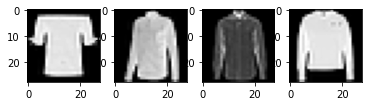

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(141)
randomno = np.random.randint(0,len(x_train))
plt.imshow(x_train[randomno],cmap=plt.get_cmap('gray'))

plt.subplot(142)
randomno = np.random.randint(0,len(x_train))
plt.imshow(x_train[randomno],cmap=plt.get_cmap('gray'))

plt.subplot(143)
randomno = np.random.randint(0,len(x_train))
plt.imshow(x_train[randomno],cmap=plt.get_cmap('gray'))

plt.subplot(144)
randomno = np.random.randint(0,len(x_train))
plt.imshow(x_train[randomno],cmap=plt.get_cmap('gray'))

In [5]:
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as K

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(60000,28,28,1)

In [8]:
x_test = x_test.reshape(10000,28,28,1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
import tensorflow as tf

In [22]:
#Building CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])
                       
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)             

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('loss')<0.2):
      print("\n Loss is low, so training is cancelled")
      self.model.stop_training = True

In [24]:
callbacks = myCallback()

In [25]:
h = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test),callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.4448 - accuracy: 0.8473 - val_loss: 1.6501 - val_accuracy: 0.5025
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2798 - accuracy: 0.9003 - val_loss: 0.2670 - val_accuracy: 0.9031
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2354 - accuracy: 0.9159 - val_loss: 0.2583 - val_accuracy: 0.9036
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2038 - accuracy: 0.9267 - val_loss: 0.2319 - val_accuracy: 0.9178
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1840 - accuracy: 0.9344 - val_loss: 0.2366 - val_accuracy: 0.9143

 Loss is low, so training is cancelled


In [26]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 90us/step


[0.23658719216585158, 0.9143000245094299]

In [38]:
pred = model.predict(x_test)

In [43]:
pred[0]

array([7.2762538e-07, 4.0650096e-07, 8.1219093e-07, 2.4564304e-07,
       1.2858113e-06, 2.8225197e-05, 3.3787100e-07, 7.2275943e-05,
       9.5075848e-06, 9.9988616e-01], dtype=float32)

In [40]:
np.argmax(pred[0])

9

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [42]:
np.argmax(y_test[0])

9

In [44]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def read_img(filename):
  img = load_img(filename,grayscale=True,target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img / 255.0
  return img

In [50]:
from google.colab import files
data_to_load = files.upload()

Saving dttownload.jpg to dttownload.jpg


In [47]:
img = read_img('/content/imagesfgfr.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [48]:
class_prediction = model.predict_classes(img)

In [49]:
print(class_prediction)

[8]
